# <span style="color:blue ">Project: Investigate Medical Appointment No Shows Dataset

## <span style="color:blue ">Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <span style="color:blue ">Introduction
### <span style="color:blue ">Dataset Description 
This dataset provides more than 100,000 medical appointments which made by any person in order to receive medical treatment in Brazil but the most important question here is whether a patient shows up to the appointment or not. It includes 14 characteristics(attributes) of each patient.
    
    1_ PatientId 
    The patient id number.
    2_ AppointmentID 
    The assigned appointment id for each patient which consists of seven digits. 
    3_ Gender 
    To identify the patient's gender. 
    4_ ScheduledDay  
    The arranged day of the appointment when patients have to visit the doctor.
    5_ AppointmentDay 
    The day when patients book an appointment.
    6_ Age
    The patient's age
    7_ Neighbourhood
    The appointment place
    8_ Scholarship
    In case the patient has a scholarship in the government support in Brazil 
    9_ Hipertension 
    This attribute indicates whether the patient has high blood pressure or not
    10_ Diabetes 
    This attribute indicates whether the patient has diabetes or not
    11_ Alcoholism
    This attribute indicates whether the patient has an alcohol addiction
    12_ Handcap
    This attribute indicates whether the patient has a physical or mental disability or not.
    13_ SMS_received
    The number of messages sent to the patient.
    14_ No-show.  
    This attribute indicates whether the patient has shown up to the appointment or not. 



### <span style="color:blue ">My question for Analysis

    Does receiving SMS or having a scholarship affect the show-up for the scheduled appointment?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in c:\users\alamr\anaconda\lib\site-packages (0.25.0)


<a id='wrangling'></a>
## <span style="color:blue ">Data Wrangling


### <span style="color:blue ">General Properties

In [3]:
# Load the data and display the row and column of my dataset
df = pd.read_csv('noshowappointments.csv')
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Checking the statistics in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### As shown in the statistical summary of the dataset, the dataset has 110527 patients and the majority of them  were between 37 and 55 years old.  Also,  9% of the patients have scholarship and 32% received an SMS. 

In [5]:
# Number of unique values in PatientId
df.PatientId.nunique()

62299

### <span style="color:blue ">Data Cleaning

#### After I load the dataset, I used some Pandas functions to help me to find and fix any issues within my dataset

In [6]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### There is no missing values but there is an incorrect data types

In [7]:
#Display all data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### To fix incorrect data types I have to change from string ScheduledDay and AppointmentDay to datetime

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
#To confirm changes
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [10]:
#Check for duplicates in the data
df.duplicated().sum()

0

In [11]:
# Drop the columns I'm not going to use
df.drop(['Hipertension','Diabetes','Alcoholism','Handcap','Neighbourhood'], axis=1, inplace=True)

In [12]:
#To confirm changes
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,0,No


#### I noticed in the previous function nunique() that I have duplicate patients records

In [13]:
df.duplicated(subset=['PatientId']).sum()

48228

In [14]:
#### Drop duplicates Patients
df.drop_duplicates(subset=['PatientId'], inplace=True)

In [15]:
##To confirm changes
df.duplicated(subset=['PatientId']).sum()

0

In [16]:
#To confirm changes
df.shape

(62299, 9)

#### When I saw the statistics before the minimum value is -1 which is unrealistic age. Also there are zeros in the age columns but I think it represent ages under a year

In [17]:
df.drop(df.index[(df["Age"] == -1)],inplace=True)

<a id='eda'></a>
## <span style="color:blue ">Exploratory Data Analysis

#### This is the histogram for the entire data frame. As shown below most of the patients are young and the histogram is skewed to the right. Also, the majority didn't receive SMS and didn't have scholarships

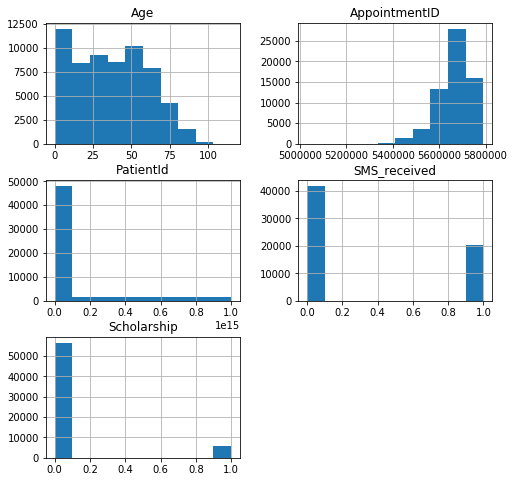

In [18]:
#Exploring with histogram
df.hist(figsize= (8,8));


### <span style="color:blue ">Research Question (Does receiving SMS or having a scholarship affect the show-up for the scheduled appointment?)

#### I used rename function because it gives me an attribute error once I write df.No-show because of the hyphen symbol so I renamed the column

In [19]:
df = df.rename(columns={'No-show': 'noShow'})

In [20]:
df.loc[:,'noShow'] = df.loc[:,'noShow'].apply(lambda x: 0 if x == "No" else 1)
df.groupby('Scholarship').mean().loc[:,'noShow']


Scholarship
0    0.192638
1    0.225812
Name: noShow, dtype: float64

The people with Scholarship has no-show rate 22% versus the people without Scholarship is 19%.

In [21]:
df.groupby('SMS_received').mean().loc[:,'noShow']

SMS_received
0    0.159937
1    0.269246
Name: noShow, dtype: float64

The people with who received SMS has no-show rate 27% versus the people without SMS is 16%.

In [22]:
# define a function avoid repetitive code
def plotComparison(x ,hue,title,xticks,xtickss,legend):
    sns.countplot(x=x, hue=hue)
    plt.title(title)
    plt.xticks(xticks,xtickss)
    plt.legend(legend)

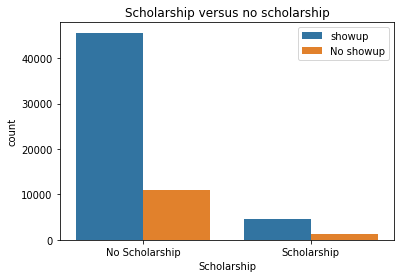

In [23]:
plotComparison(df['Scholarship'],df['noShow'],'Scholarship versus no scholarship',[0,1], ['No Scholarship', 'Scholarship'],['showup' , "No showup"])

#### A lot of patients didn't have scholarships but they attend their appointment. So, It didn't affect at all

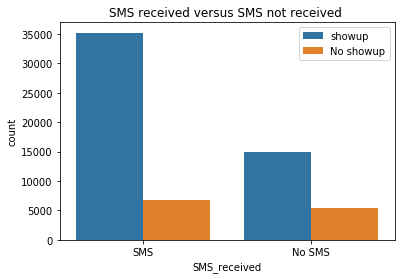

In [25]:
plotComparison(df['SMS_received'],df['noShow'],'SMS received versus SMS not received ',[0,1], ['SMS', 'No SMS'],['showup' , "No showup"])

#### The patients who didn't show up although they received SMS have slightly the same number of patients who didn't receive SMS and didn't show up. Therefore, receiving SMS doesn't  affect show up

<a id='conclusions'></a>
## <span style="color:blue ">Conclusions

To conclude, I investigated medical appointment no shows dataset using all data analysis steps. The most focused question here that requires an answer is whether or not the patients showed up based on their characteristics. And I wondered if the patients would be more committed if they had scholarships or received an SMS reminding them. But it turns out that wasn't the case. There are many steps I have done first I load the data from Kaggle, then I clean it from duplicate data and changed some data types. After that, I represent the data visually and find some interesting insights. I think the only limitation here was that the collected data were in one year only, which is 2016, so the results were based on a quite short period of time. It would be better to collect this dataset in more than a year to lead to more accurate results.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0